# CS5228 Kaggle Competition

## Install Packages

In [8]:
import sys

!conda install --yes --prefix {sys.prefix} descartes
!conda install --yes --prefix {sys.prefix} geopandas
!conda install --yes --prefix {sys.prefix} shapely

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import descartes
# import geopandas as gpd
# from shapely.geometry import Point, Polygon

## Import Data

In [104]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
train.shape , test.shape 

((431732, 17), (107934, 16))

In [5]:
train.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                431732 non-null  object 
 1   town                 431732 non-null  object 
 2   flat_type            431732 non-null  object 
 3   block                431732 non-null  object 
 4   street_name          431732 non-null  object 
 5   storey_range         431732 non-null  object 
 6   floor_area_sqm       431732 non-null  float64
 7   flat_model           431732 non-null  object 
 8   eco_category         431732 non-null  object 
 9   lease_commence_date  431732 non-null  int64  
 10  latitude             431732 non-null  float64
 11  longitude            431732 non-null  float64
 12  elevation            431732 non-null  float64
 13  subzone              431732 non-null  object 
 14  planning_area        431732 non-null  object 
 15  region           

## Exploring Resale Price

In [43]:
print(train['resale_price'].describe())

count    4.317320e+05
mean     3.018196e+05
std      1.298623e+05
min      2.970000e+04
25%      2.052000e+05
50%      2.839500e+05
75%      3.735000e+05
max      1.123200e+06
Name: resale_price, dtype: float64


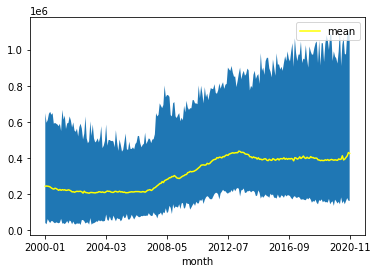

In [51]:
time_series = train.groupby('month')['resale_price'].agg(['min', 'max', 'mean'])
time_series.reset_index(inplace=True)

ax  = time_series.plot(x='month', y='mean', c='yellow')
plt.fill_between(x='month', y1='min', y2='max', data=time_series)

<AxesSubplot:xlabel='resale_price'>

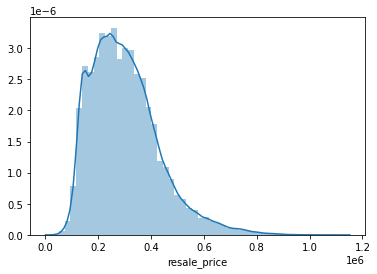

In [105]:
sns.distplot(train['resale_price'])

In [106]:
print("Skewness: %f" % train['resale_price'].skew())
print("Kurtosis: %f" % train['resale_price'].kurt())

Skewness: 0.989732
Kurtosis: 1.411183


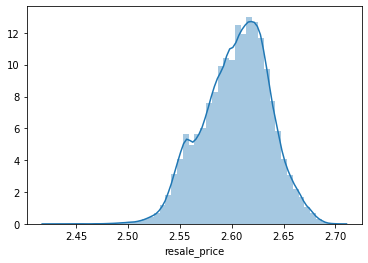

In [109]:
train_log = train
train_log['resale_price'] = np.log1p(train['resale_price'])
sns.distplot(train_log['resale_price']);

In [110]:
print("Skewness: %f" % train_log['resale_price'].skew())
print("Kurtosis: %f" % train_log['resale_price'].kurt())

Skewness: -0.271899
Kurtosis: -0.147466


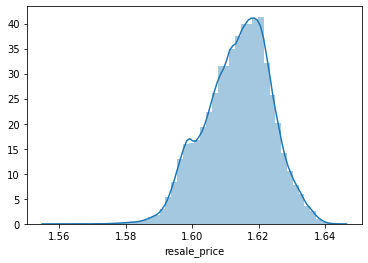

In [111]:
train_sqrt = train
train_sqrt['resale_price'] = np.sqrt(train['resale_price'])
sns.distplot(train_sqrt['resale_price']);

In [112]:
print("Skewness: %f" % train_sqrt['resale_price'].skew())
print("Kurtosis: %f" % train_sqrt['resale_price'].kurt())

Skewness: -0.288445
Kurtosis: -0.131448


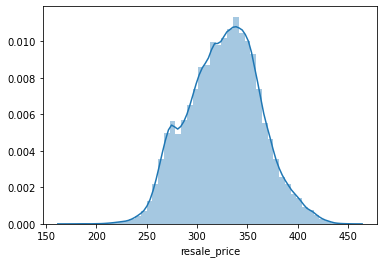

In [113]:
from scipy import stats

train_boxcox = train
train_boxcox['resale_price'] = stats.boxcox(train['resale_price'])[0]
sns.distplot(train_boxcox['resale_price']);

In [114]:
print("Skewness: %f" % train_boxcox['resale_price'].skew())
print("Kurtosis: %f" % train_boxcox['resale_price'].kurt())

Skewness: -0.010350
Kurtosis: -0.261794


## Exploring Features

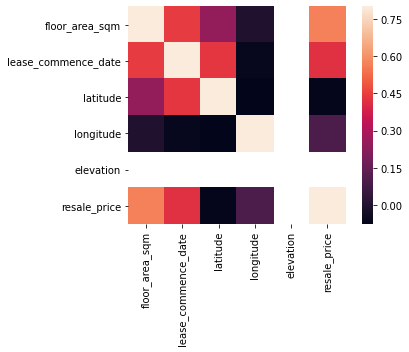

In [56]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, vmax=.8, square=True);

In [67]:
print("Flat Types:")
print(train['flat_type'].unique())

print("\nStorey Range:")
print(train['storey_range'].unique())

print("\nFlat Range:")
print(train['flat_model'].unique())

Flat Types:
['4 room' '5-room' '5 room' '3 room' '3-room' 'executive' '2 room'
 '4-room' 'multi generation' '2-room' '1-room' '1 room']

Storey Range:
['01 to 03' '10 to 12' '07 to 09' '13 to 15' '16 to 18' '04 to 06'
 '22 to 24' '01 to 05' '19 to 21' '11 to 15' '06 to 10' '25 to 27'
 '31 to 33' '28 to 30' '37 to 39' '34 to 36' '21 to 25' '16 to 20'
 '40 to 42' '46 to 48' '43 to 45' '26 to 30' '36 to 40' '31 to 35'
 '49 to 51']

Flat Model:
['model a' 'improved' 'premium apartment' 'new generation' 'apartment'
 'simplified' 'standard' 'adjoined flat' 'multi generation' 'maisonette'
 'model a2' 'model a maisonette' 'dbss' 'improved maisonette' 'terrace'
 'type s1' 'type s2' '2 room' 'premium apartment loft'
 'premium maisonette']


In [85]:
train['flat_type'] = train['flat_type'].str.replace('1 room', '1-room')
train['flat_type'] = train['flat_type'].str.replace('2 room', '2-room')
train['flat_type'] = train['flat_type'].str.replace('3 room', '3-room')
train['flat_type'] = train['flat_type'].str.replace('4 room', '4-room')
train['flat_type'] = train['flat_type'].str.replace('5 room', '5-room')
train['flat_type'].value_counts()

4-room              169597
3-room              125721
5-room               98697
executive            32724
2-room                4522
1-room                 286
multi generation       185
Name: flat_type, dtype: int64

## Converting Datatypes

In [58]:
from datetime import datetime

# convert date format to date time; since no day was given, the date will be 1st of every month
train_new['datetime'] = pd.to_datetime(train['month'])

# reorder the columns
datetime = pd.DataFrame(train_new.pop('datetime'))
train_new = datetime.join(train_new)
train_new.head()

,datetime,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
0,2001-08-01,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0
1,2014-10-01,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0
2,2020-09-01,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0
3,2000-10-01,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0
4,2013-01-01,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0
